# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv
import glob


from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)




In [3]:
# Store filepath in a variable
myData = "data/Combined_Data_Base_PN.csv"
myData_df = pd.read_csv(myData, encoding="ISO-8859-1")
#myData_df.dtypes
#myData_df.head()
myData_df.tail()

,date,recession,gdp_change,median_house,gold_price,dow_open,fed_rate,InvYield_10yr_5yr,unemp_rate,earnings_chg,cpi,inflation,housing_starts
674,3/19/19,0,2.7,310600,1302.286,25025.31,2.40,0.20,3.8,153,254.202,0.56,1199
675,4/19/19,0,2.3,339000,1287.650,26019.67,2.41,0.17,3.6,216,255.548,0.53,1270
676,5/19/19,0,2.3,311000,1282.460,26075.10,2.45,0.21,3.6,62,256.092,0.21,1264
677,6/19/19,0,2.3,306000,1358.488,26639.06,2.38,0.22,3.7,178,256.143,0.02,1233
678,7/19/19,0,2.3,312800,1414.611,24830.16,2.39,0.25,3.7,159,256.571,0.17,1215


In [4]:
myData_df.columns

Index(['date', 'recession', 'gdp_change', 'median_house', 'gold_price',
       'dow_open', 'fed_rate', 'InvYield_10yr_5yr', 'unemp_rate',
       'earnings_chg', 'cpi', 'inflation', 'housing_starts'],
      dtype='object')

In [5]:
# Visualizing both classes
#plt.scatter(X[:, 0], X[:, 1], c=y)
#plt.scatter(myData_df['fed_rate'],myData_df['dow_open'])

myData_df['recession'].value_counts()


0    589
1     90
Name: recession, dtype: int64

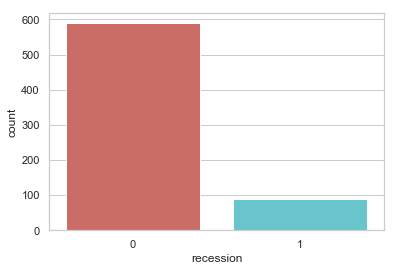

In [8]:
sns.countplot(x='recession', data=myData_df, palette='hls')
plt.show()


In [6]:
myData_df.groupby('recession').mean()

,gdp_change,median_house,gold_price,dow_open,fed_rate,InvYield_10yr_5yr,unemp_rate,earnings_chg,cpi,inflation,housing_starts
recession,,,,,,,,,,,
0,3.513752,137521.731749,495.313503,6478.126435,4.799898,0.359949,5.904244,188.039049,135.217175,0.290730,1477.471986
1,-0.156667,104696.666667,405.002233,4066.570333,8.198778,0.175889,6.512222,-170.800000,115.093333,0.476778,1139.311111


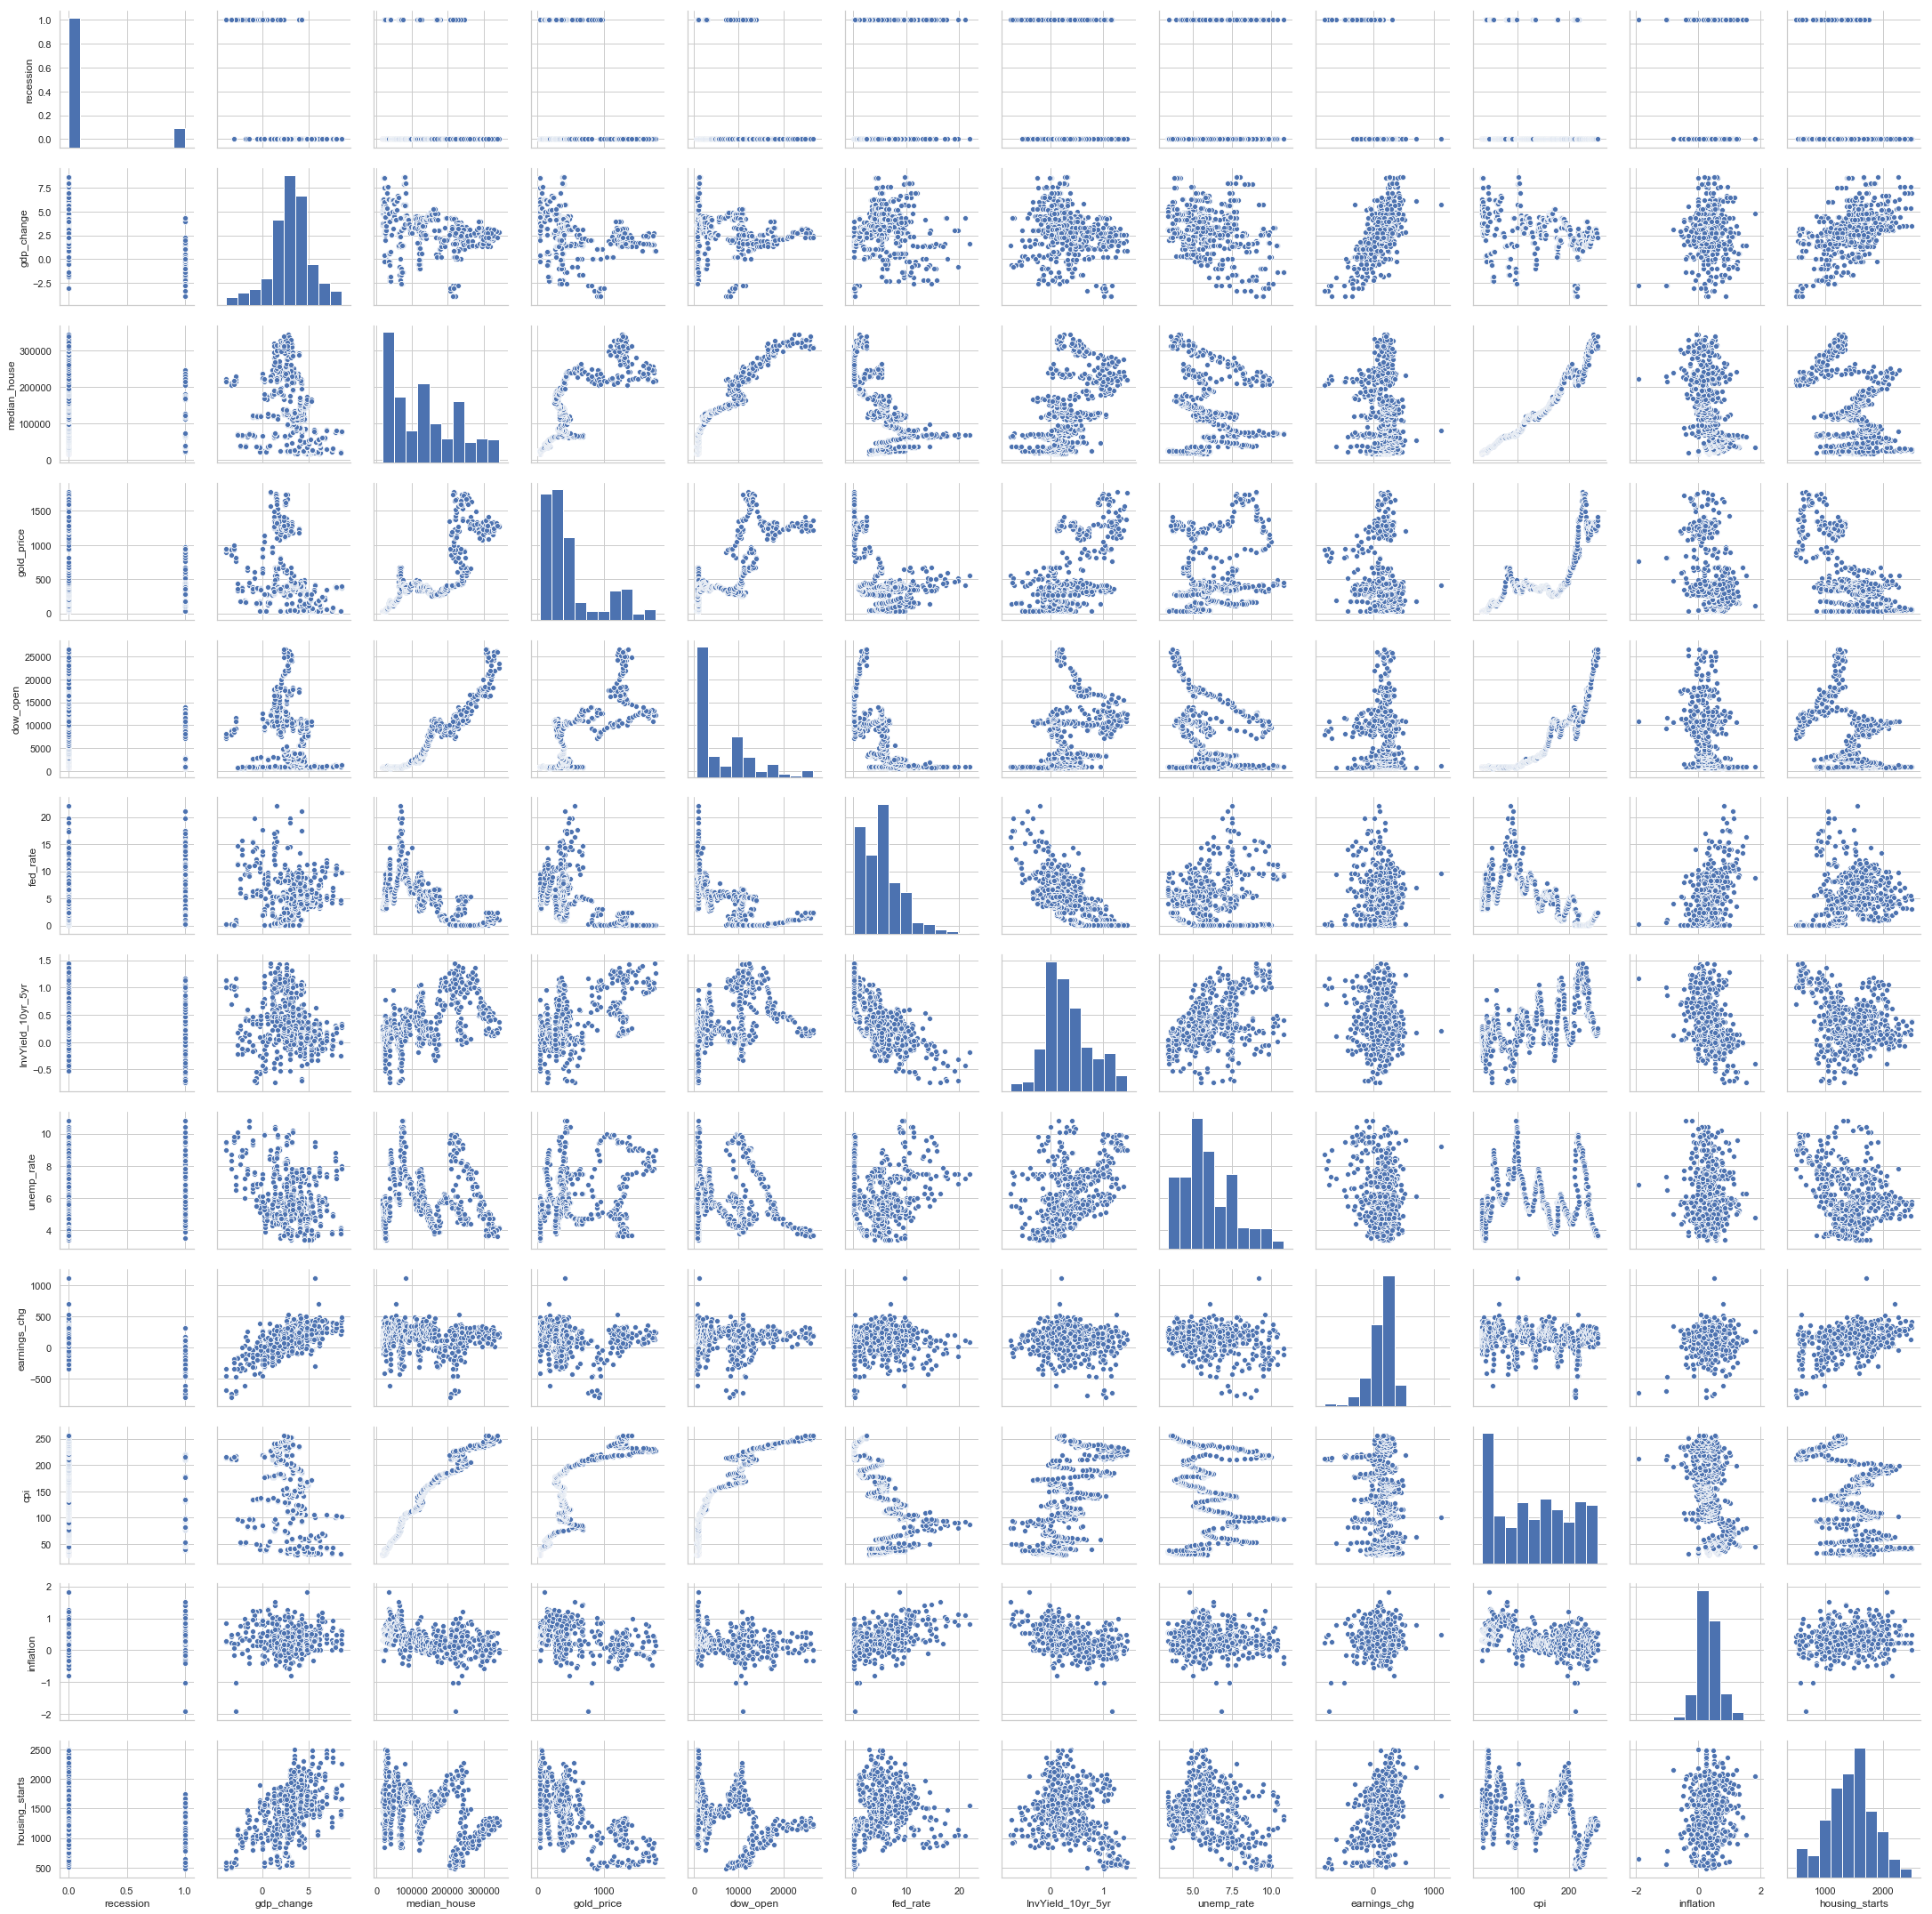

In [7]:
# Basic correlogram
sns.pairplot(myData_df,kind="scatter")
#sns.plt.show()
plt.show()

# without regression
#sns.pairplot(df, kind="scatter")
#plot.show()



In [19]:
cols= ['gdp_change','fed_rate','unemp_rate',
       'earnings_chg','inflation','housing_starts']

#['median_house','gold_price','dow_open','fed_rate','InvYield_10yr_5yr','unemp_rate','cpi',
#       'earnings_chg','inflation','housing_starts']
# 'gdp_change',


X=myData_df[cols]
y=myData_df['recession']

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.108050
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.724     
Dependent Variable: recession        AIC:              158.7322  
Date:               2019-09-28 14:05 BIC:              185.8559  
No. Observations:   679              Log-Likelihood:   -73.366   
Df Model:           5                LL-Null:          -265.63   
Df Residuals:       673              LLR p-value:      6.4302e-81
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
gdp_change        -0.8233   0.1566 -5.2578 0.0000 -1.1302 -0.5164
fed_rate           0.3609   0.0647  5.5781 0.0000  0.2341  0.4877

Split our data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Create a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Fit (train) or model using the training data

In [23]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Validate the model using the test data

In [24]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9548133595284872
Testing Data Score: 0.9352941176470588


Make predictions

In [25]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
new_data

#plt.scatter(X[:, 0], X[:, 1], c=y)
#plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

array([[-2,  6]])

In [17]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

NameError: name 'new_data' is not defined

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})